**Loai Gamal 20180206**

**Ahmed Kardy 20180018**

In [1]:
import keras
from keras import layers
import numpy as np

In [2]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim_before = 10

**First VAE with two different methods with different values**

In [3]:
inputs1 = keras.Input(shape=(original_dim,))
h1 = layers.Dense(intermediate_dim, activation='relu')(inputs1)
z_mean1 = layers.Dense(latent_dim_before)(h1)

z_log_sigma1 = layers.Dense(latent_dim_before)(h1)
print(z_mean1.shape)

(None, 10)


In [6]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim_before),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z1 = layers.Lambda(sampling)([z_mean1, z_log_sigma1])

In [8]:
# Create encoder
encoder1 = keras.Model(inputs1, [z_mean1, z_log_sigma1, z1], name='encoder')

# Create decoder
latent_inputs1 = keras.Input(shape=(latent_dim_before,), name='z_sampling')
x1 = layers.Dense(intermediate_dim, activation='relu')(latent_inputs1)
outputs1 = layers.Dense(original_dim, activation='sigmoid')(x1)
decoder1 = keras.Model(latent_inputs1, outputs1, name='decoder')

In [9]:
# instantiate VAE model
outputs1 = decoder1(encoder1(inputs1)[2])
vae1 = keras.Model(inputs1, outputs1, name='vae_mlp')
encoder1.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           50240       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           650         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           650         ['dense[0][0]']                  
                                                                                            

In [10]:
reconstruction_loss1 = keras.losses.binary_crossentropy(inputs1, outputs1)
reconstruction_loss1 *= original_dim
kl_loss1 = 1 + z_log_sigma1 - K.square(z_mean1) - K.exp(z_log_sigma1)
kl_loss1 = K.sum(kl_loss1, axis=-1)
kl_loss1 *= -0.5
vae_loss1 = K.mean(reconstruction_loss1 + kl_loss1)
vae1.add_loss(vae_loss1)

In [12]:
vae1.compile(optimizer='adam')

In [13]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae1.fit(x_train, x_train,
        epochs=20,
        batch_size=32)
        #validation_data=(x_test, x_test))

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 145.8411
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 116.2317
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 110.1274
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 106.9891
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 104.9513
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 103.5034
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 102.3731
Epoch 8/20
1875/1875 [==============================] - 8s 5ms/step - loss: 101.5582
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 100.9377
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss: 100.4501
Epoch 11/20
1875/1875 [==============================] - 10s 5ms/step - loss: 10

In [14]:
z_zz_vae1 = encoder1.predict(x_train)
print (z_zz_vae1[2].shape)
print (z_zz_vae1[2][0].shape)

(60000, 10)
(10,)


In [15]:
x_decoded_vae1_1 = decoder1.predict(z_zz_vae1[2]+0.4)
x_decoded_vae1_2 = decoder1.predict(z_zz_vae1[0]+z_zz_vae1[1] * 0.6)

Train data


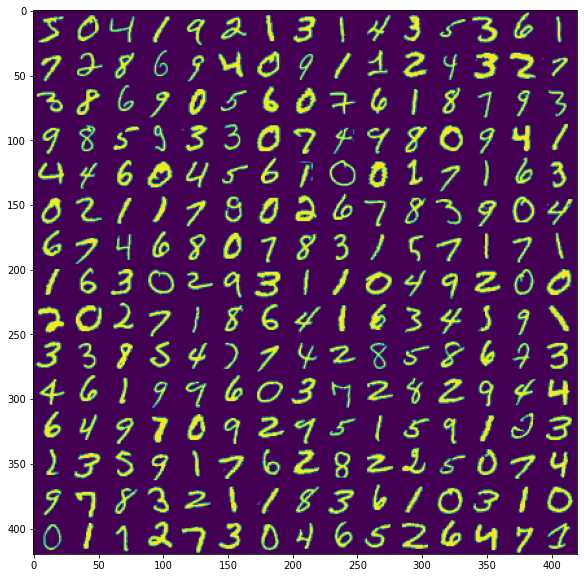

In [16]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

decoder1.predict(z_zz_vae1[2]+0.4)



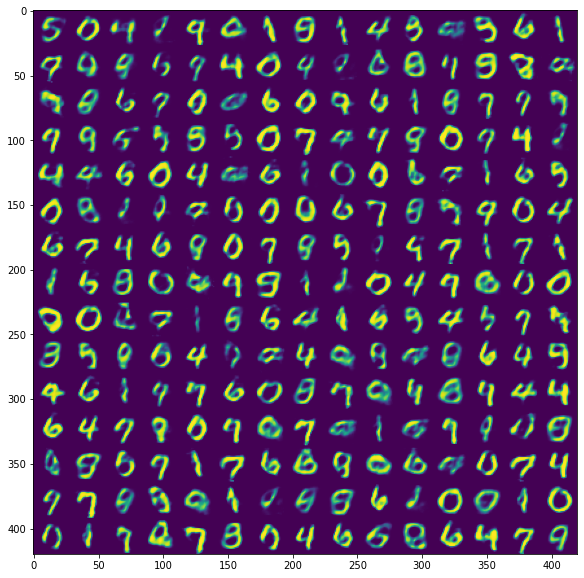

In [17]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded_vae1_1[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


decoder1.predict(z_zz_vae1[0]+z_zz_vae1[1] * 0.6)

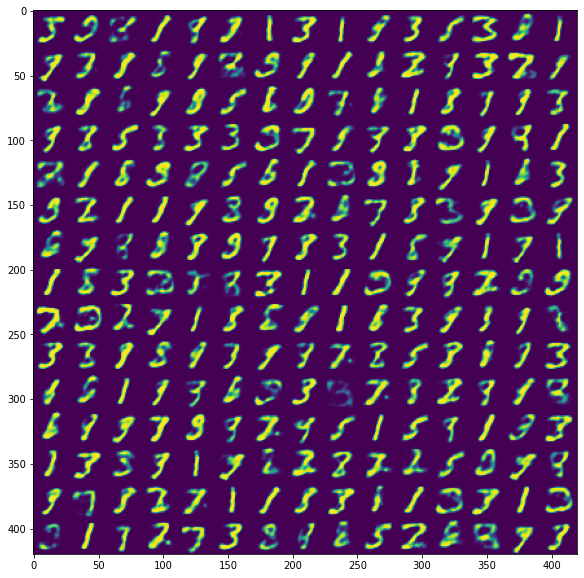

In [18]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded_vae1_2[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


**Deeper VAE**

In [20]:
inputs2 = keras.Input(shape=(original_dim,))

h2 = layers.Dense(350, activation='relu')(inputs2)

h2 = layers.Dense(intermediate_dim, activation='relu')(h2)
z_mean2 = layers.Dense(latent_dim_before)(h2)

z_log_sigma2 = layers.Dense(latent_dim_before)(h2)
print(z_mean2.shape)

(None, 10)


In [21]:
z2 = layers.Lambda(sampling)([z_mean2, z_log_sigma2])

In [23]:
# Create encoder
encoder2 = keras.Model(inputs2, [z_mean2, z_log_sigma2, z2], name='encoder')

# Create decoder
latent_inputs2 = keras.Input(shape=(latent_dim_before,), name='z_sampling')
x2 = layers.Dense(intermediate_dim, activation='relu')(latent_inputs2)

x2 = layers.Dense(350, activation='relu')(x2)

outputs2 = layers.Dense(original_dim, activation='sigmoid')(x2)
decoder2 = keras.Model(latent_inputs2, outputs2, name='decoder')

In [24]:
# instantiate VAE model
outputs2 = decoder2(encoder2(inputs2)[2])
vae2 = keras.Model(inputs2, outputs2, name='vae_mlp')
encoder2.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 350)          274750      ['input_3[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 64)           22464       ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 10)           650         ['dense_12[0][0]']               
                                                                                            

In [25]:
reconstruction_loss2 = keras.losses.binary_crossentropy(inputs2, outputs2)
reconstruction_loss2 *= original_dim
kl_loss2 = 1 + z_log_sigma2 - K.square(z_mean2) - K.exp(z_log_sigma2)
kl_loss2 = K.sum(kl_loss2, axis=-1)
kl_loss2 *= -0.5
vae_loss2 = K.mean(reconstruction_loss2 + kl_loss2)
vae2.add_loss(vae_loss2)

In [26]:
vae2.compile(optimizer='adam')

In [27]:
vae2.fit(x_train, x_train,
        epochs=20,
        batch_size=32)
        #validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 125.6128
Epoch 2/20
1875/1875 [==============================] - 25s 14ms/step - loss: 100.3762
Epoch 3/20
1875/1875 [==============================] - 22s 11ms/step - loss: 95.6219
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 93.0180
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 91.3192
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 90.0396
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 89.1009
Epoch 8/20
1875/1875 [==============================] - 26s 14ms/step - loss: 88.3158
Epoch 9/20
1875/1875 [==============================] - 24s 13ms/step - loss: 87.6557
Epoch 10/20
1875/1875 [==============================] - 22s 12ms/step - loss: 87.1355
Epoch 11/20
1875/1875 [==============================] - 21s 11ms/step - loss: 86.6156
Epoch 12/20
1875/1875 [===========================

In [29]:
z_zz_vae2 = encoder2.predict(x_train)
print (z_zz_vae2[2].shape)
print (z_zz_vae2[2][0].shape)

(60000, 10)
(10,)


In [32]:
x_decoded_vae2_1 = decoder2.predict(z_zz_vae2[2]+0.4)
x_decoded_vae2_2 = decoder2.predict(z_zz_vae2[0]+z_zz_vae2[1] * 0.6)

Train data

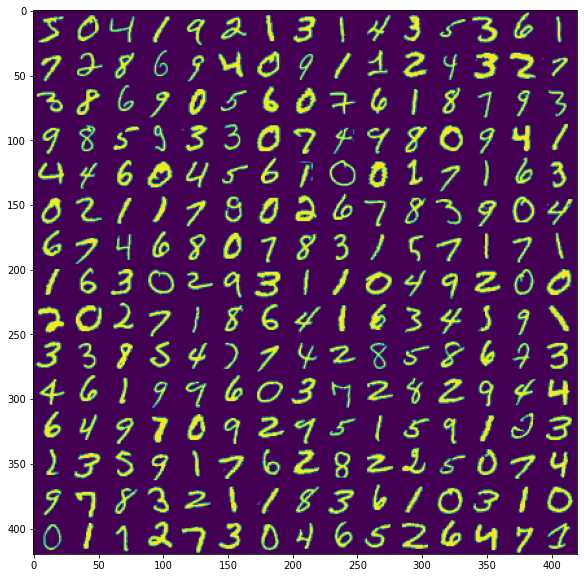

In [31]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

decoder2.predict(z_zz_vae2[2]+0.4)

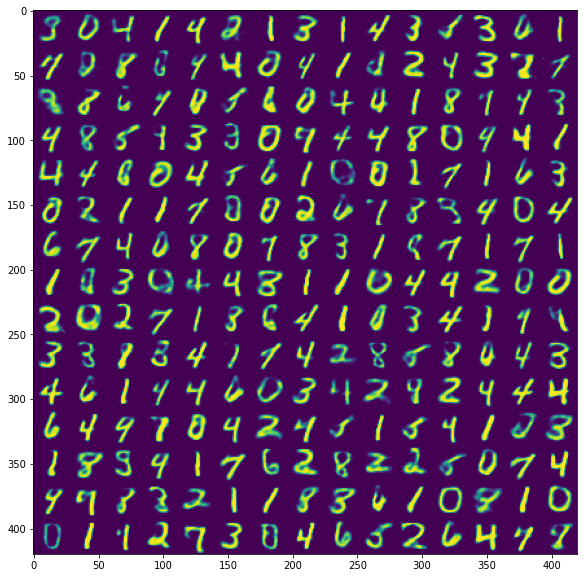

In [33]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded_vae2_1[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


decoder2.predict(z_zz_vae2[0]+z_zz_vae2[1] * 0.6)

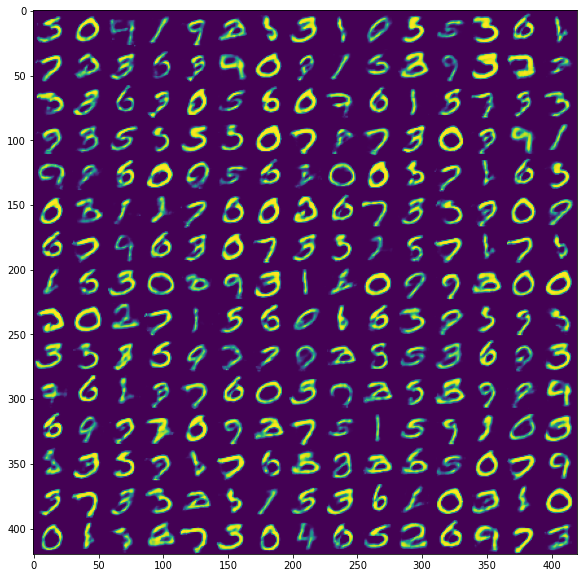

In [35]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded_vae2_2[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


In [36]:
latent_dim_after = 30

inputs3 = keras.Input(shape=(original_dim,))
h3 = layers.Dense(intermediate_dim, activation='relu')(inputs3)
z_mean3 = layers.Dense(latent_dim_after)(h3)

z_log_sigma3 = layers.Dense(latent_dim_after)(h3)
print(z_mean3.shape)

(None, 30)


In [38]:
def sampling2(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim_after),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z3 = layers.Lambda(sampling2)([z_mean3, z_log_sigma3])

In [39]:
# Create encoder
encoder3 = keras.Model(inputs3, [z_mean3, z_log_sigma3, z3], name='encoder')

# Create decoder
latent_inputs3 = keras.Input(shape=(latent_dim_after,), name='z_sampling')
x3 = layers.Dense(intermediate_dim, activation='relu')(latent_inputs3)
outputs3 = layers.Dense(original_dim, activation='sigmoid')(x3)
decoder3 = keras.Model(latent_inputs3, outputs3, name='decoder')

In [40]:
# instantiate VAE model
outputs3 = decoder3(encoder3(inputs3)[2])
vae3 = keras.Model(inputs3, outputs3, name='vae_mlp')
encoder3.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_21 (Dense)               (None, 64)           50240       ['input_4[0][0]']                
                                                                                                  
 dense_22 (Dense)               (None, 30)           1950        ['dense_21[0][0]']               
                                                                                                  
 dense_23 (Dense)               (None, 30)           1950        ['dense_21[0][0]']               
                                                                                            

In [41]:
reconstruction_loss3 = keras.losses.binary_crossentropy(inputs3, outputs3)
reconstruction_loss3 *= original_dim
kl_loss3 = 1 + z_log_sigma3 - K.square(z_mean3) - K.exp(z_log_sigma3)
kl_loss3 = K.sum(kl_loss3, axis=-1)
kl_loss3 *= -0.5
vae_loss3 = K.mean(reconstruction_loss3 + kl_loss3)
vae3.add_loss(vae_loss3)

In [42]:
vae3.compile(optimizer='adam')

In [44]:
vae3.fit(x_train, x_train,
        epochs=20,
        batch_size=32)
        #validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 134.3988
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 97.1332
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 89.1690
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 85.5317
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 83.6860
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 82.3909
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 81.2109
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 80.2294
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 79.4906
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 78.9034
Epoch 11/20
1875/1875 [==============================] - 8s 4ms/step - loss: 78.4636
Epoch 12/20
1875/1875 [==============================] - 9s 5ms/step - l

In [45]:
z_zz_vae3 = encoder3.predict(x_train)
print (z_zz_vae3[2].shape)
print (z_zz_vae3[2][0].shape)

(60000, 30)
(30,)


In [46]:
x_decoded_vae3_1 = decoder3.predict(z_zz_vae3[2]+0.4)
x_decoded_vae3_2 = decoder3.predict(z_zz_vae3[0]+z_zz_vae3[1] * 0.6)

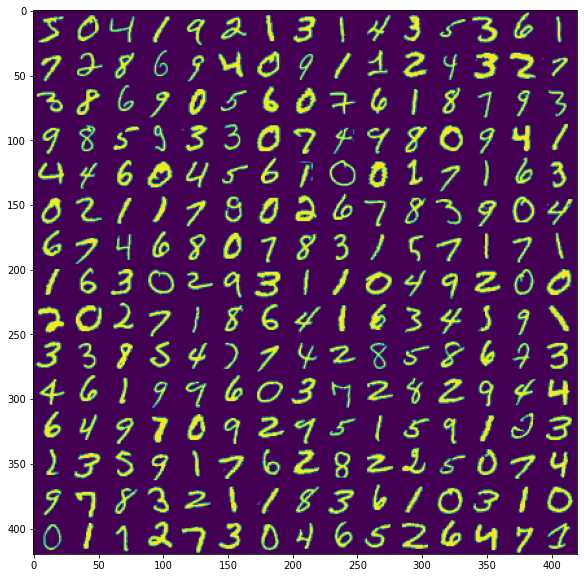

In [47]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

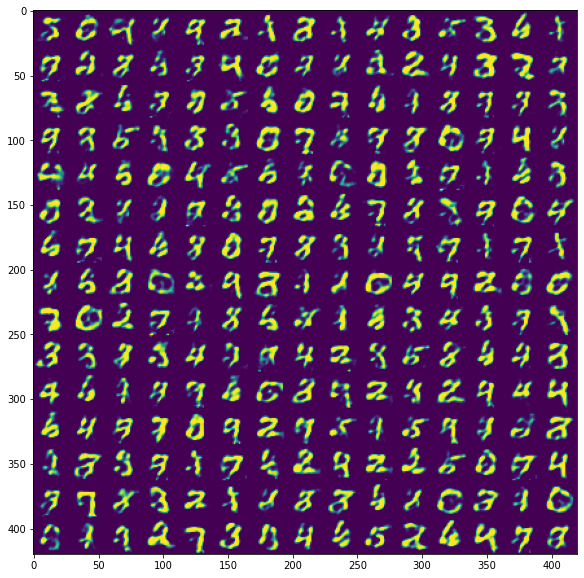

In [48]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded_vae3_1[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


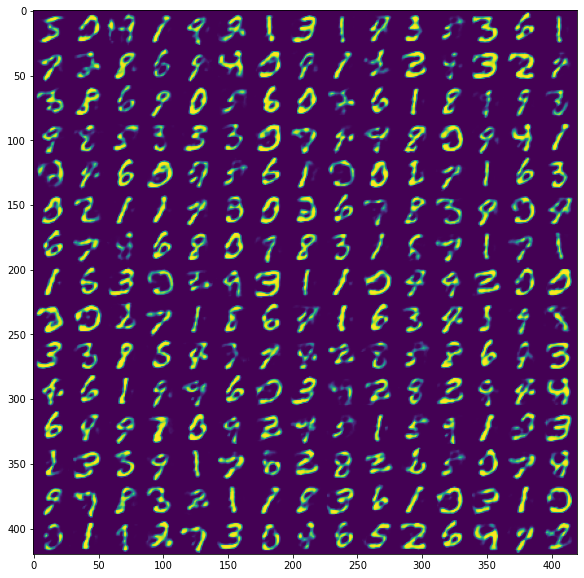

In [49]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded_vae3_2[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()
